In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork
import DimReduction

In [2]:
image_size = 28
no_of_different_labels = 10
image_pixels = image_size * image_size
train_data_orig = np.loadtxt("/content/sample_data/mnist_train_small.csv", delimiter=",")
test_data_orig = np.loadtxt("/content/sample_data/mnist_test.csv", delimiter=",")

In [3]:
train_size, test_size = train_data_orig.shape[0], test_data_orig.shape[0]
X_all = np.vstack((train_data_orig[:, 1:], test_data_orig[:, 1:]))
y_train_classes, y_test_classes = train_data_orig[:, 0], test_data_orig[:, 0]
X_all, scales = DimReduction.Normalize(X_all)
X_pca, U = DimReduction.PCA(X_all)
train_data, test_data = np.vsplit(X_pca, [train_size])

In [4]:
y_train, y_test = np.zeros((train_size, 10)), np.zeros((test_size, 10))
for k in range(train_size):
  y_train[k, int(y_train_classes[k])] = 1
for k in range(test_size):
  y_test[k, int(y_test_classes[k])] = 1

In [5]:
train_size = 20000
test_size = 10000
X_train = train_data[:train_size, :]
y_train = y_train[:train_size, :]
X_test = test_data[:test_size, :]
y_test = y_test[:test_size, :]

print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(20000, 523) (20000, 10) (10000, 523) (10000, 10)


In [6]:
new_pixels = np.shape(X_train)[1]

In [7]:
net = NeuralNetwork.Network((new_pixels, 100, no_of_different_labels))
print(net.Layers)

(523, 100, 10)


In [8]:
parameters = {'LearningRate' : 0.05, 'BatchSize' : 200, 'Tolerance' : 1e-4, 'MaxIter' : 5000, 'PrintStep' : 100}

In [9]:
J = net.SGD(X_train, y_train, **parameters)

iteration 0 	 J = 5.724405602218702
iteration 100 	 J = 1.806095388597894
iteration 200 	 J = 1.3598613527861445
iteration 300 	 J = 1.135147225029038
iteration 400 	 J = 0.9982144571744339
iteration 500 	 J = 0.9044825623155935
iteration 600 	 J = 0.835788164831301
iteration 700 	 J = 0.7841709452196043
iteration 800 	 J = 0.743144067025389
iteration 900 	 J = 0.7094600311771784
--- SGD finished ---


In [10]:
pred_train = net.Predict(X_train)
correct_train = sum(np.argmax(pred_train, axis = 1) == np.argmax(y_train, axis = 1))
accuracy_train = correct_train/train_size
print(f"accuracy on train = {accuracy_train} ({correct_train}/{train_size})")

accuracy on train = 0.90615 (18123/20000)


In [11]:
pred_test = net.Predict(X_test)
correct_test = sum(np.argmax(pred_test, axis = 1) == np.argmax(y_test, axis = 1))
accuracy_test = correct_test/test_size
print(f"accuracy on test = {accuracy_test} ({correct_test}/{test_size})")

accuracy on test = 0.9024 (9024/10000)


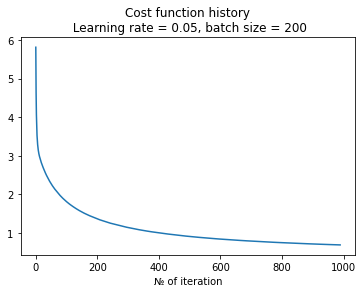

In [12]:
plt.plot(J)
title_obj = plt.title(f"Cost function history\n Learning rate = {parameters['LearningRate']}, batch size = {parameters['BatchSize']}")
xlabel_obj = plt.xlabel('№ of iteration')
plt.show()

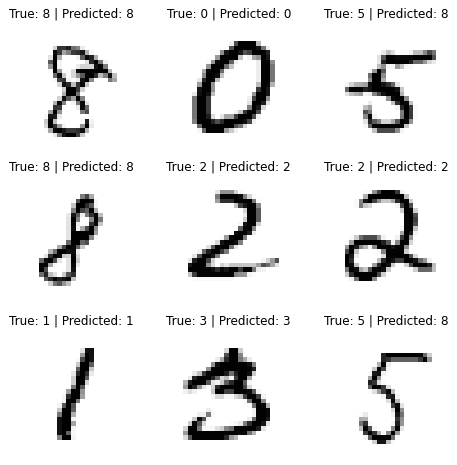

In [13]:
np.seterr(over='ignore')
DemoInd = np.random.choice(test_data_orig.shape[0], 9, replace = False)
DemoSet = test_data_orig[DemoInd, 1:]
DemoSet_pca = DemoSet @ U
DemoPred = np.argmax(net.Predict(DemoSet_pca), axis = 1)
DemoTrue = np.argmax(y_test[DemoInd], axis = 1)
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows+1):
    img = DemoSet[i-1, :].reshape(image_size, image_size) 
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'Greys')
    plt.axis('off')
    plt.title(f"True: {DemoTrue[i-1]} | Predicted: {DemoPred[i-1]}")
plt.show()